Dependencies installation:

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#If you don't have mglearn installed at you computer, you will need to "uncomment" the next line
#%pip install mglearn
import mglearn

from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score, accuracy_score, roc_curve, auc

# regression models
from sklearn.linear_model import LogisticRegression


#Dependencies used in Logistic Regression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer



#Dependencies used in KNN
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

#Random Forrest
from sklearn.ensemble import RandomForestClassifier


Now we are going to read our dataset. Notice that the dataset being loaded is the test.csv & train.csv and not JobApplicants.csv - the reason for that is because we have been working on different computers and therefore had the need for a stable range of data as a training set.

For more information on how the training set was created please visit traintestspilit.ipynb

In [3]:
# Load the training data
df_train = pd.read_csv('Train.csv')
# Load the test data
df_test = pd.read_csv('Test.csv')

#Check headers
df_train.head()
df_test.head()

,w,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,31363,<35,No,Undergraduate,1,Man,No,Dev,9,1,India,7372.0,Bash/Shell;C++;Go;HTML/CSS;JavaScript;Matlab;N...,26,1
1,50414,>35,No,Undergraduate,1,Man,No,Dev,20,14,Canada,77303.0,C#;HTML/CSS;Java;JavaScript;SQL;TypeScript;Doc...,18,1
2,55640,>35,No,NoHigherEd,0,Man,No,Dev,35,31,Germany,89580.0,C;C++;JavaScript;LISP;Managed Hosting,5,0
3,52376,>35,No,Undergraduate,1,Man,No,Dev,30,32,Chile,200000.0,Assembly;Bash/Shell;C;COBOL;Groovy;HTML/CSS;Ja...,27,1
4,12724,>35,No,Master,1,Man,No,Dev,30,21,Russian Federation,28308.0,C#;Java;SQL;ASP.NET;Spring;Microsoft SQL Serve...,7,1


In [4]:
df_train.drop(['w'], axis=1, inplace=True)
df_test.drop(['w'], axis=1, inplace=True)

In [5]:
df_train['Age_over_35'] = df_train['Age'].apply(lambda x: 1 if x == '>35' else 0)
df_test['Age_over_35'] = df_test['Age'].apply(lambda x: 1 if x == '>35' else 0)

## Arranging the data

In [56]:
categorical_cols = ['Age', 'EdLevel', 'Gender', 'MainBranch']
numerical_cols = ['YearsCode', 'YearsCodePro', 'PreviousSalary', 'ComputerSkills']

X_train = df_train[categorical_cols + numerical_cols]  
y_train = df_train['Employed']
X_test = df_test[categorical_cols + numerical_cols]  
y_test = df_test['Employed']

Testing to see if train and test has the same ammount of data and different rows

In [57]:
X_train

,Age,EdLevel,Gender,MainBranch,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills
0,>35,Other,Man,NotDev,35,15,77556.0,16
1,>35,PhD,Man,Dev,35,30,124092.0,7
2,<35,Master,NonBinary,Dev,18,2,78672.0,12
3,<35,Undergraduate,Man,Dev,10,1,44790.0,7
4,>35,Master,Man,Dev,21,17,155112.0,16
...,...,...,...,...,...,...,...,...
51418,>35,Undergraduate,Man,Dev,30,21,117229.0,7
51419,>35,Undergraduate,Man,Dev,30,22,58368.0,17
51420,<35,Undergraduate,Man,Dev,8,1,51663.0,15
51421,<35,Undergraduate,Man,Dev,9,8,62697.0,11


In [8]:
X_test

,Age,EdLevel,Gender,MainBranch,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills
0,<35,Undergraduate,Man,Dev,9,1,7372.0,26
1,>35,Undergraduate,Man,Dev,20,14,77303.0,18
2,>35,NoHigherEd,Man,Dev,35,31,89580.0,5
3,>35,Undergraduate,Man,Dev,30,32,200000.0,27
4,>35,Master,Man,Dev,30,21,28308.0,7
...,...,...,...,...,...,...,...,...
22034,<35,Master,Man,Dev,10,1,51887.0,21
22035,<35,Master,Man,Dev,16,9,90647.0,17
22036,<35,Undergraduate,Man,Dev,12,8,54049.0,22
22037,<35,Undergraduate,Man,Dev,5,2,21408.0,21


In [9]:
y_train

0        0
1        1
2        1
3        0
4        1
        ..
51418    0
51419    0
51420    1
51421    1
51422    1
Name: Employed, Length: 51423, dtype: int64

In [10]:
y_test

0        1
1        1
2        0
3        1
4        1
        ..
22034    1
22035    1
22036    1
22037    1
22038    1
Name: Employed, Length: 22039, dtype: int64

# Logistic Regression

This pipeline handles the categorical data. It first replaces missing values with the most frequent value in each column and then applies one-hot encoding to convert categorical variables into a set of binary variables.

In [162]:
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # Replace missing values with the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # Convert categorical variable into dummy/indicator variables
])

This pipeline processes the numerical data. It replaces missing values with the median and then scales the data using standardization (z-score normalization).

In [163]:
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), # Replace missing values with the median
    ('scaler', StandardScaler())
])

Allow different columns or column subsets of the input to be transformed separately and the features generated by each transformer will be concatenated to form a single feature space.

In [164]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_cols),
        ('cat', categorical_pipeline, categorical_cols)
    ])

We integrate the preprocessing steps with a logistic regression classifier in a single pipeline.

In [165]:
# Create the logistic regression pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

Train the logistic regression model using the training data.

In [166]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['YearsCode', 'YearsCodePro',
                                                   'PreviousSalary',
                                                   'ComputerSkills']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Age', 'EdLevel', 'Gender',
                                                   'MainBranch'])])),
                ('classifier', LogisticRegression())])

In [167]:
print("Training set score: {:.3f}".format(pipeline.score(X_train, y_train)))
print("Test score: {:.5f}".format(pipeline.score(X_test, y_test)))

Training set score: 0.785
Test score: 0.78284


Evaluate the model's performance using various metrics such as accuracy, F1 score, precision, and recall.

In [168]:
y_pred = pipeline.predict(X_test)


"""print("Training set score: {:.3f}".format(pipeline.score(X_train, y_train)))
print("Test score: {:.5f}".format(pipeline.score(X_test, y_test)))"""
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='binary')  # Adjust based on your target variable
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")


Accuracy: 0.7828395117745814
F1 Score: 0.7968073363335314
Precision: 0.7978234994048631
Recall: 0.7957937584803256


In [169]:
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__class_weight': [None, 'balanced'],
    'classifier__solver': ['liblinear', 'lbfgs']  
}

# Create a GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)



Best parameters: {'classifier__C': 10, 'classifier__class_weight': None, 'classifier__solver': 'liblinear'}


In [170]:
# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='binary')
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.7829302599936476
F1 Score: 0.7969094922737306
Precision: 0.7978578714722884
Recall: 0.7959633649932157


### Feature Importance

After training the logistic regression model, it's insightful to examine the coefficients assigned to each feature to understand their importance.

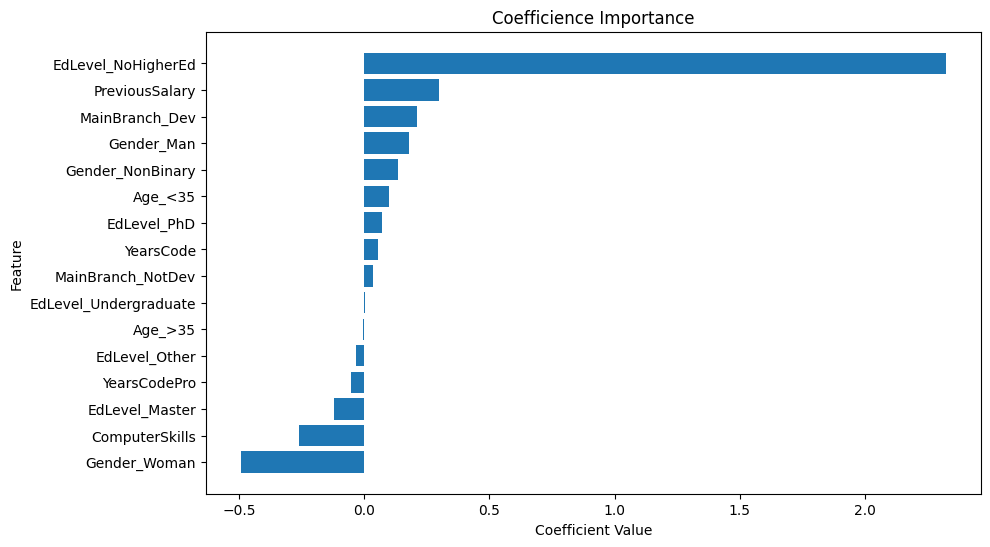

,Feature,Coefficient
3,EdLevel_NoHigherEd,2.321375
14,PreviousSalary,0.298723
10,MainBranch_Dev,0.210726
7,Gender_Man,0.180489
8,Gender_NonBinary,0.136550
0,Age_<35,0.099672
5,EdLevel_PhD,0.072156
12,YearsCode,0.056590
11,MainBranch_NotDev,0.036769
6,EdLevel_Undergraduate,0.003825


In [171]:
# 1. Extract the feature names from the one-hot encoder within the pipeline
ohe = (best_model.named_steps['preprocessor']
       .named_transformers_['cat']
       .named_steps['onehot'])
feature_names_cat = ohe.get_feature_names_out(input_features=categorical_cols)

# Concatenate with numerical feature names to get the full list
feature_names = np.concatenate([feature_names_cat, numerical_cols], axis=0)
coefficients = best_model.named_steps['classifier'].coef_.flatten()
#import matplotlib.pyplot as plt

# Sort the features by their coefficient values
sorted_indices = np.argsort(coefficients)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_indices)), coefficients[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), feature_names[sorted_indices])
plt.xlabel("Coefficient Value")
plt.title('Coefficience Importance')
plt.ylabel("Feature")
plt.show()
# Create a DataFrame with feature names and coefficients
feature_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort the DataFrame by the coefficient values
sorted_feature_df = feature_df.sort_values(by='Coefficient', ascending=False)

# Display the DataFrame
sorted_feature_df

As it is unexpected that ComputerSkills have a negative coefficient value, we did some further analysis on correlation between the features

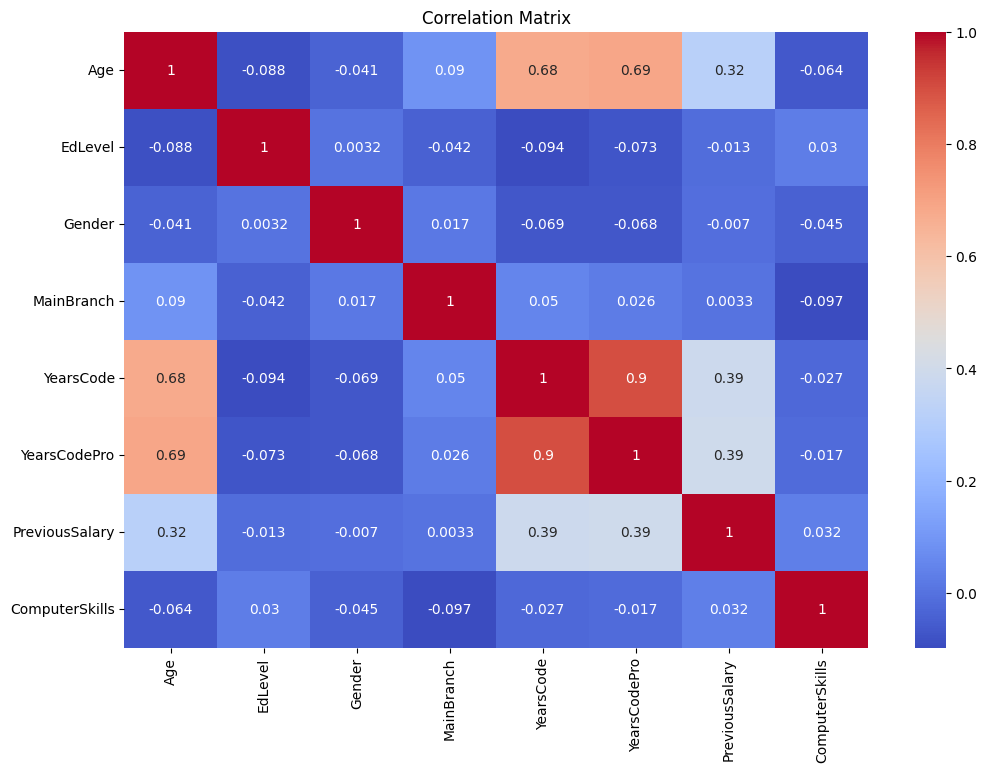

In [172]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Combine your categorical and numerical columns for correlation analysis
all_columns = categorical_cols + numerical_cols

# For categorical data, we need to convert them into numerical format. One way is to use get_dummies()
df_for_correlation = pd.get_dummies(df_train[all_columns])

# Calculate the correlation matrix
correlation_matrix = df_for_correlation.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

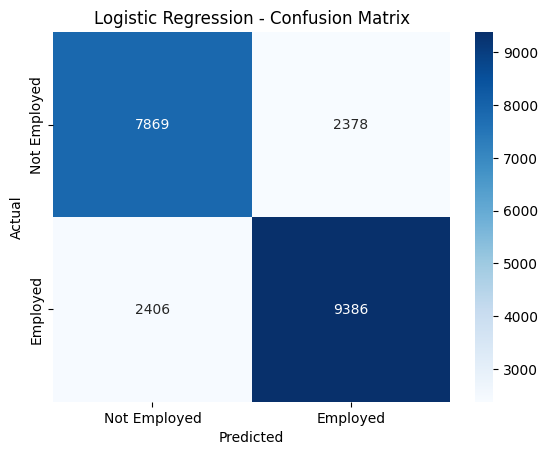

In [173]:
# Plot the confusion matrix
cm_lr = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Employed', 'Employed'], yticklabels=['Not Employed', 'Employed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression - Confusion Matrix')
plt.show()

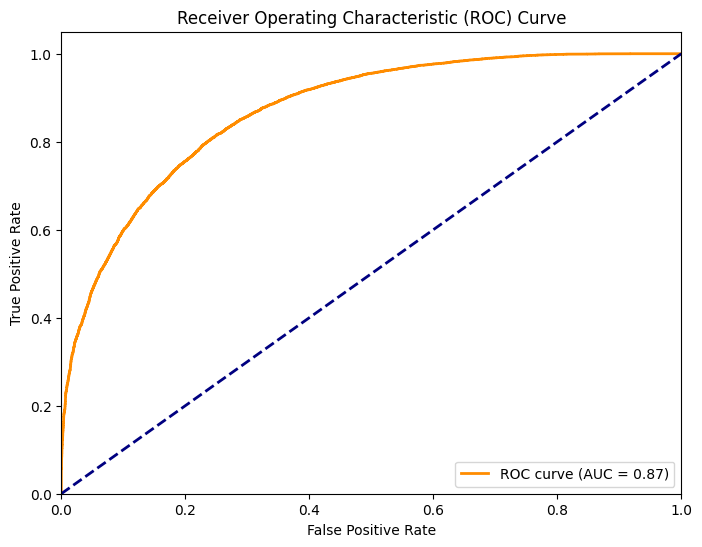

In [174]:
y_prob = best_model.predict_proba(X_test)[:,1]

# Step 2: Compute FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Step 3: Compute the AUC
roc_auc = auc(fpr, tpr)

# Step 4: Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### Visualizing all columns

This part has been created to cover the need to analyze a specific column if relevant

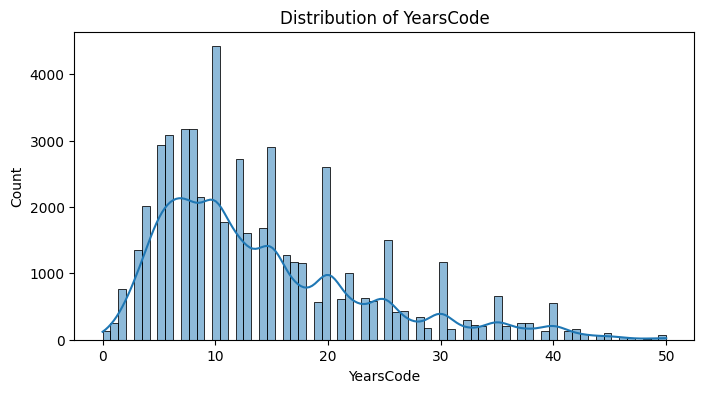

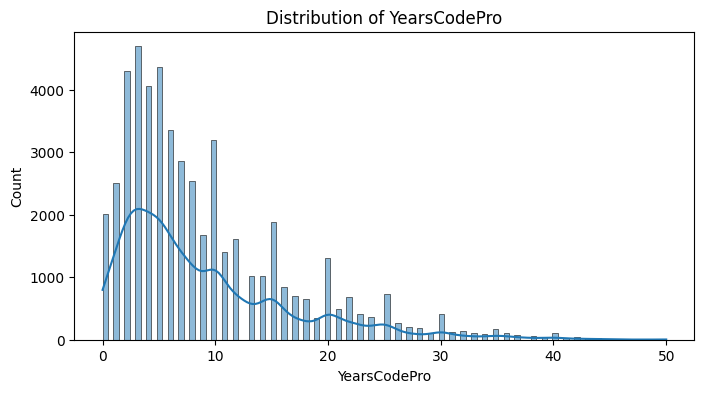

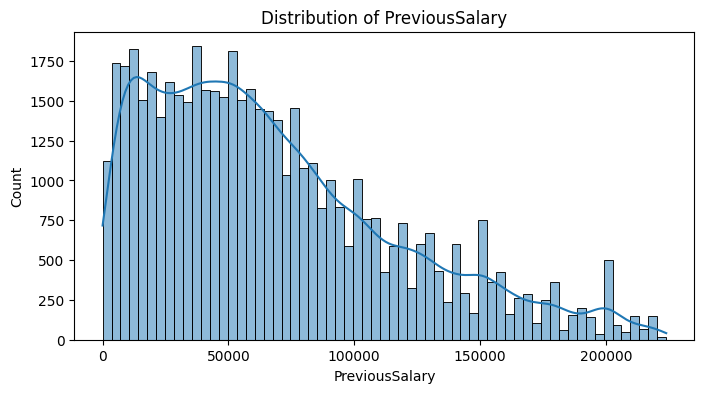

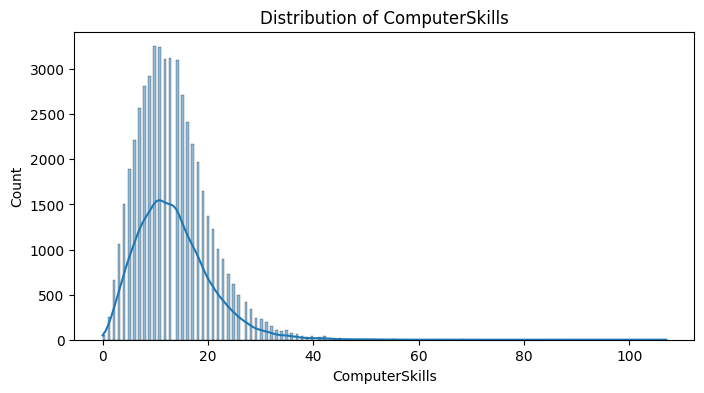

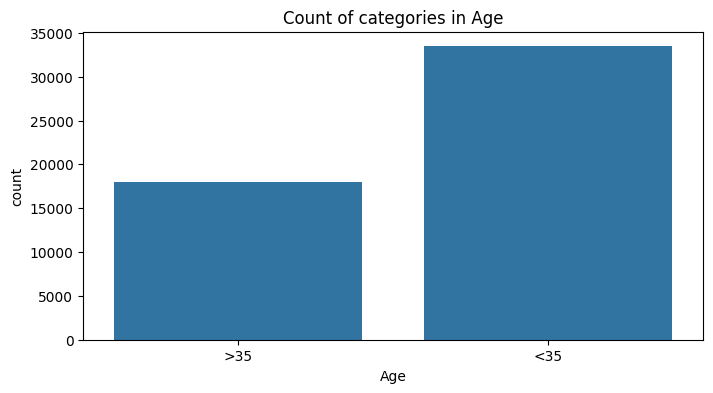

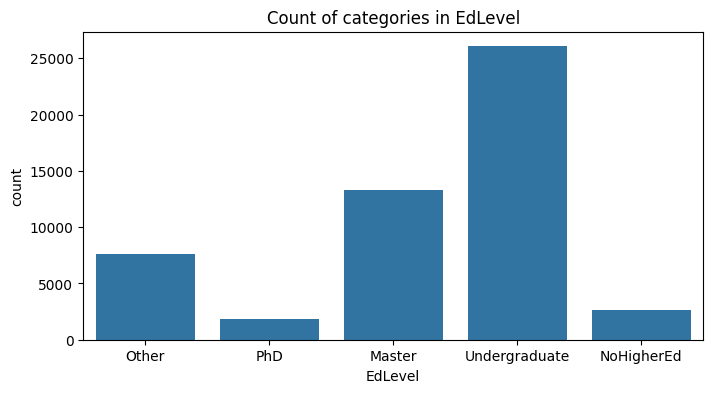

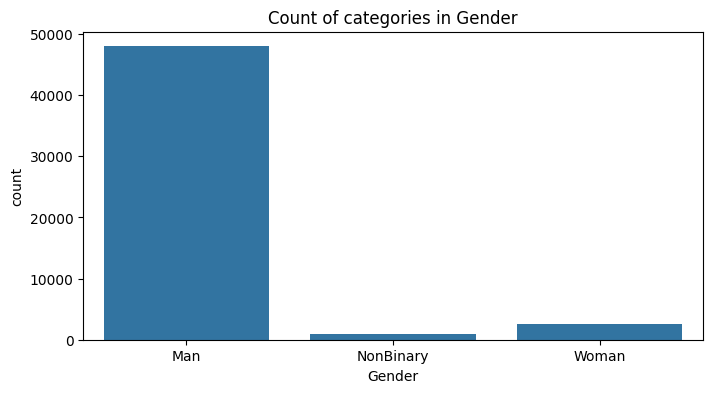

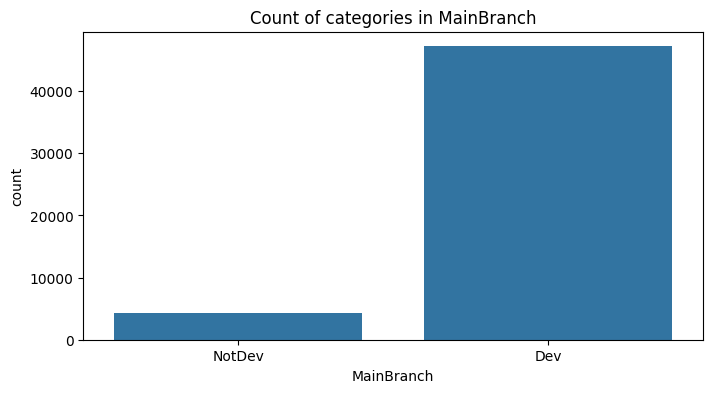

In [77]:
# Visualizing numerical columns
for column in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df_train, x=column, kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

# Visualizing categorical columns
for column in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df_train, x=column)
    plt.title(f'Count of categories in {column}')
    plt.show()

Visualization over the relationship of each column and "Employed"

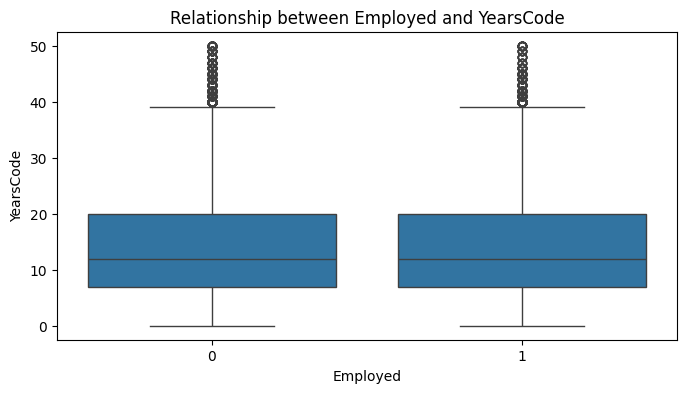

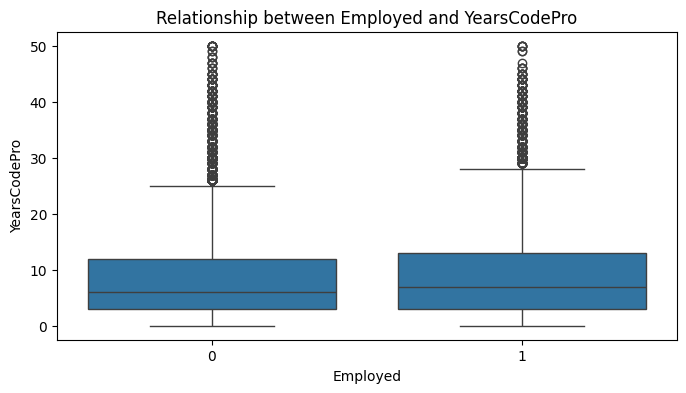

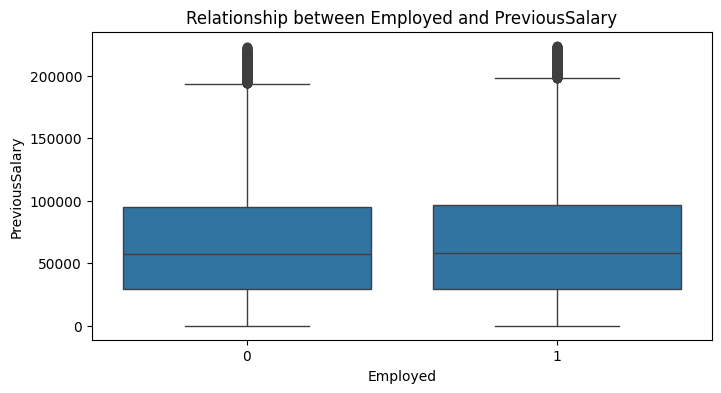

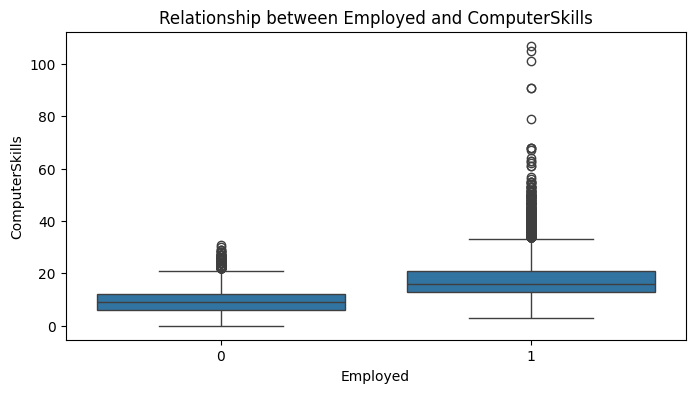

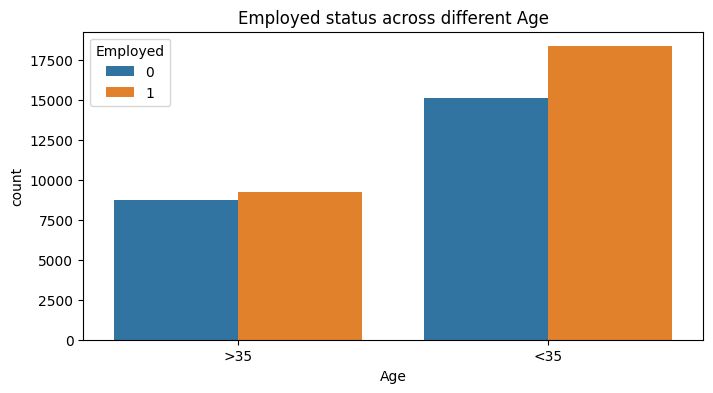

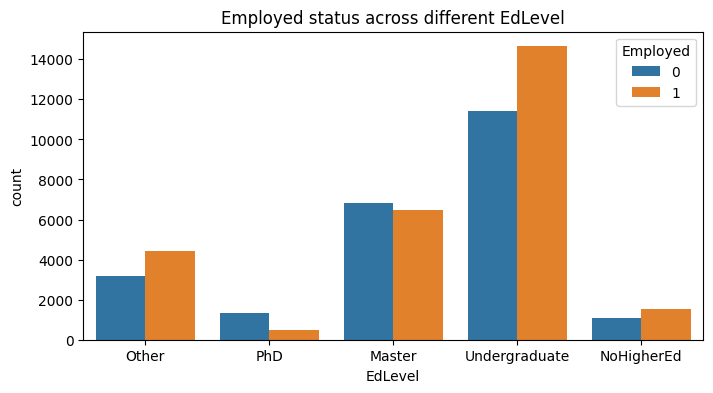

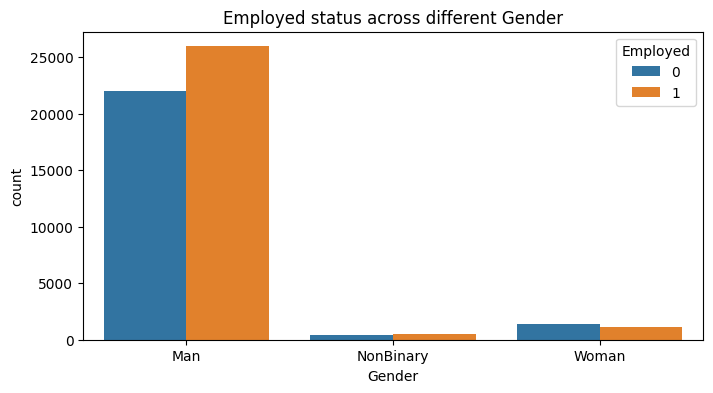

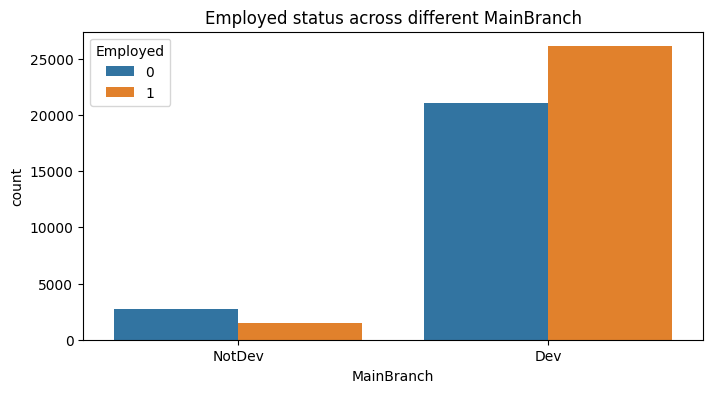

In [26]:
# For numerical features
for column in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Employed', y=column, data=df_train)
    plt.title(f'Relationship between Employed and {column}')
    plt.show()

# For categorical features
for column in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=column, hue='Employed', data=df_train)
    plt.title(f'Employed status across different {column}')
    plt.show()

# KNN - Model

Categorical variables are encoded to transform them into numerical format, as kNN requires numerical input.

In [175]:
# Encode categorical variables
label_encoders = {}
for column in ['Age', 'EdLevel', 'Gender', 'MainBranch']:
    label_encoders[column] = LabelEncoder()
    df_train[column] = label_encoders[column].fit_transform(df_train[column])
    df_test[column] = label_encoders[column].fit_transform(df_test[column])

We select both categorical and numerical columns as features and a target variable for training and testing the model.

In [176]:
categorical_cols = ['Age', 'EdLevel', 'Gender', 'MainBranch']
numerical_cols = ['YearsCode', 'YearsCodePro', 'PreviousSalary', 'ComputerSkills']

X_train = df_train[categorical_cols + numerical_cols]  
y_train = df_train['Employed']
X_test = df_test[categorical_cols + numerical_cols]  
y_test = df_test['Employed']

KNN is sensitive to the scale of the data, so we apply standard scaling to our features.

In [177]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

A basic KNN classifier is created and fitted with the training data.

In [178]:
knn_basic = KNeighborsClassifier()
knn_basic.fit(X_train_scaled, y_train)

# Making predictions
y_pred_basic = knn_basic.predict(X_test_scaled)

# Evaluating the basic model
print("Basic KNN Model Evaluation")
print(confusion_matrix(y_test, y_pred_basic))

"""print("Training set score: {:.3f}".format(pipeline.score(X_train, y_train)))
print("Test score: {:.5f}".format(pipeline.score(X_test, y_test)))"""
accuracy = accuracy_score(y_test, y_pred_basic)
f1 = f1_score(y_test, y_pred_basic, average='binary')  # Adjust based on your target variable
precision = precision_score(y_test, y_pred_basic, average='binary')
recall = recall_score(y_test, y_pred_basic, average='binary')

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")


Basic KNN Model Evaluation
[[7351 2896]
 [2567 9225]]
Accuracy: 0.7521212396206725
F1 Score: 0.7715468573579225
Precision: 0.7610758188268295
Recall: 0.7823100407055631


### Tuned Model
We optimize the KNN model by tuning its hyperparameters like the number of neighbors, weights, and distance metric.

In [180]:
# Creating KNN Classifier model
knn = KNeighborsClassifier()

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(knn, param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}


In [181]:
# Training the model with the best parameters
knn_best = grid_search.best_estimator_
knn_best.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [182]:
y_pred = knn_best.predict(X_test_scaled)

In [183]:
# Evaluating the model
print(confusion_matrix(y_test, y_pred))

"""print("Training set score: {:.3f}".format(pipeline.score(X_train, y_train)))
print("Test score: {:.5f}".format(pipeline.score(X_test, y_test)))"""
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='binary') 
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")


[[7431 2816]
 [2347 9445]]
Accuracy: 0.7657334724806025
F1 Score: 0.7853490209121523
Precision: 0.7703286844466194
Recall: 0.8009667571234735


Confusion Matrix & ROC Curve

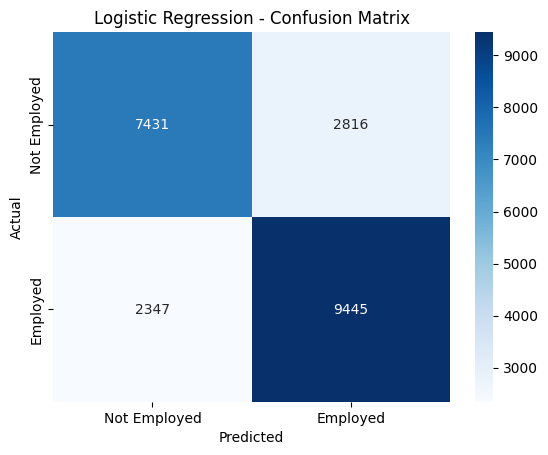

In [184]:
# Plot the confusion matrix
cm_knn = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Employed', 'Employed'], yticklabels=['Not Employed', 'Employed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression - Confusion Matrix')
plt.show()

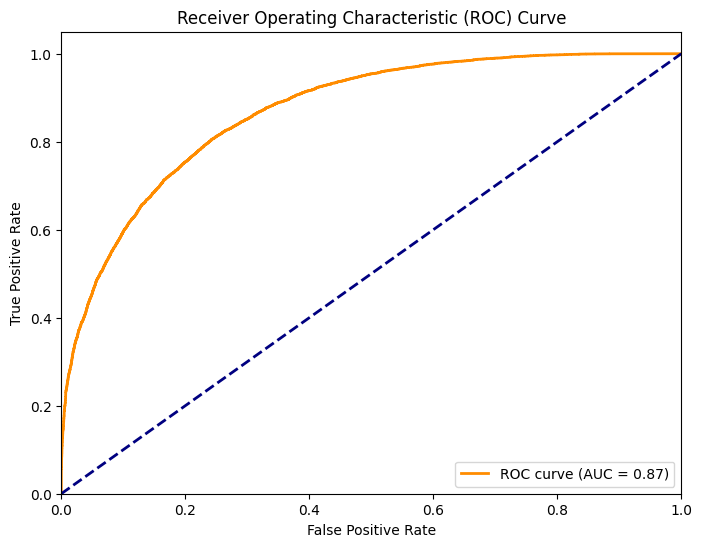

In [185]:
y_prob = best_model.predict_proba(X_test)[:,1]

# Step 2: Compute FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Step 3: Compute the AUC
roc_auc = auc(fpr, tpr)

# Step 4: Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Random forest

In [149]:
# Step 1: Load your data
train_df = pd.read_csv('Train.csv')
test_df = pd.read_csv('Test.csv')

In [150]:
# Step 1,5. We manually convert the age column to binary, as this is not caught by the one-hot encoder
train_df['Age_over_35'] = train_df['Age'].apply(lambda x: 1 if x == '>35' else 0)
test_df['Age_over_35'] = test_df['Age'].apply(lambda x: 1 if x == '>35' else 0)

In [151]:
# Step 3: Create a ColumnTransformer to transform the categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])


In [152]:
# Step 4: Create a pipeline that includes the preprocessor and the Random Forest model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42,max_features='sqrt'))
])

In [153]:
# Step 5: Separate features and target variable
X_train = train_df.drop('Employed', axis=1)  
X_train = train_df[categorical_cols + numerical_cols]
y_train = train_df['Employed']
X_test = test_df[categorical_cols + numerical_cols]
y_test = test_df['Employed']

In [154]:
# Step 6: Train the pipeline on the training data
pipeline.fit(X_train, y_train)

# Step 7: Make predictions on the test data
y_pred = pipeline.predict(X_test)

In [155]:
# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='binary')  # Adjust based on your target variable
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.7582921185171742
F1 Score: 0.7779584010670668
Precision: 0.764980736125912
Recall: 0.7913839891451832


### Tuned Model

In [ ]:
"""# Define the hyperparameters and their possible values
param_grid = {
    'classifier__n_estimators': [85, 100, 115],
    'classifier__max_depth': [7, 10, 13],
    'classifier__min_samples_split': [10, 12, 15],
    'classifier__min_samples_leaf': [4, 6, 8]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_"""

"""#Print the best parameters and model
print(f"Best Parameters: {best_params}")
print(f"Best Model: {best_model}")"""

In [156]:
# Define the hyperparameters and their possible values
param_grid = {
    'classifier__min_samples_split': [15, 30, 50]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")
print(f"Best Model: {best_model}")

Best Parameters: {'classifier__min_samples_split': 50}
Best Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['YearsCode', 'YearsCodePro',
                                                   'PreviousSalary',
                                                   'ComputerSkills']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Age', 'EdLevel', 'Gender',
                                                   'MainBranch'])])),
                ('classifier',
                 RandomForestClassifier(min_samples_split=50,
                                        random_state=42))])


In [157]:

# Step 4: Create a pipeline that includes the preprocessor and the Random Forest model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(max_depth=13, min_samples_leaf=6, min_samples_split=15, n_estimators=115, random_state=42, max_features='sqrt'))
])

# Step 6: Train the pipeline on the training data
pipeline.fit(X_train, y_train)

# Step 7: Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='binary') 
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.7846091020463724
F1 Score: 0.8040615841829364
Precision: 0.7832730197024528
Recall: 0.8259837177747625


### Feature importance

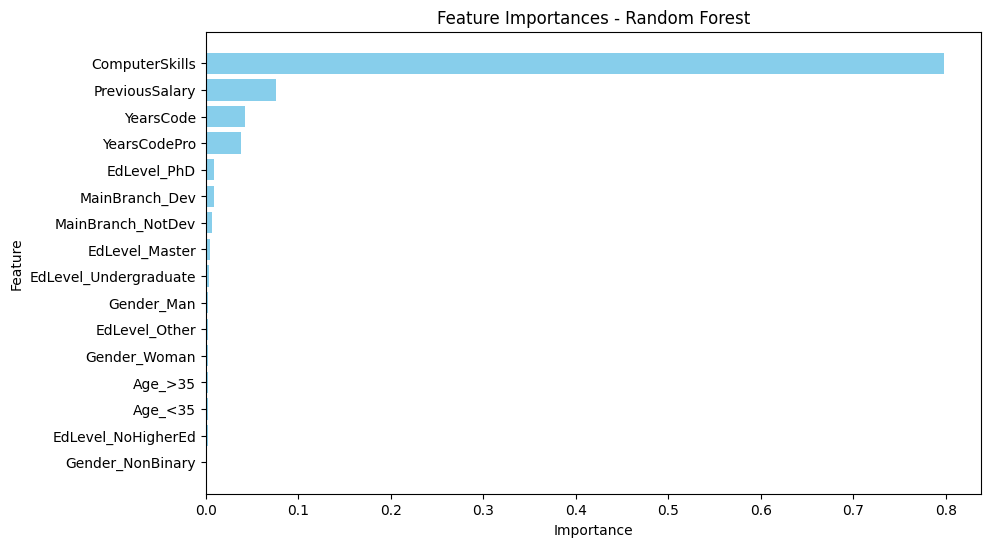

,feature,importance
3,ComputerSkills,0.797993
2,PreviousSalary,0.075567
0,YearsCode,0.042256
1,YearsCodePro,0.037552
9,EdLevel_PhD,0.008948
14,MainBranch_Dev,0.008444
15,MainBranch_NotDev,0.007192
6,EdLevel_Master,0.004182
10,EdLevel_Undergraduate,0.003052
11,Gender_Man,0.002540


In [158]:
# Get feature importances from the classifier
feature_importances = best_model.named_steps['classifier'].feature_importances_

# Get feature names for categorical features from the preprocessor step of the pipeline
# The OneHotEncoder step is named 'cat' in the ColumnTransformer
# We use get_feature_names_out() to get the feature names and then convert to a list
categorical_feature_names = best_model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_cols).tolist()

# The numerical feature names are used directly
numerical_feature_names = numerical_cols  # This is already a list

# Combine numerical and categorical feature names
feature_names = numerical_feature_names + categorical_feature_names

# Create a DataFrame to display feature importances
feature_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances}).sort_values('importance', ascending=False)
feature_df.head(16)

# Plotting
plt.figure(figsize=(10, 6))
# Select top 16 features for plotting
top_features = feature_df.head(16)
plt.barh(top_features['feature'], top_features['importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances - Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()
feature_df

### Visualization

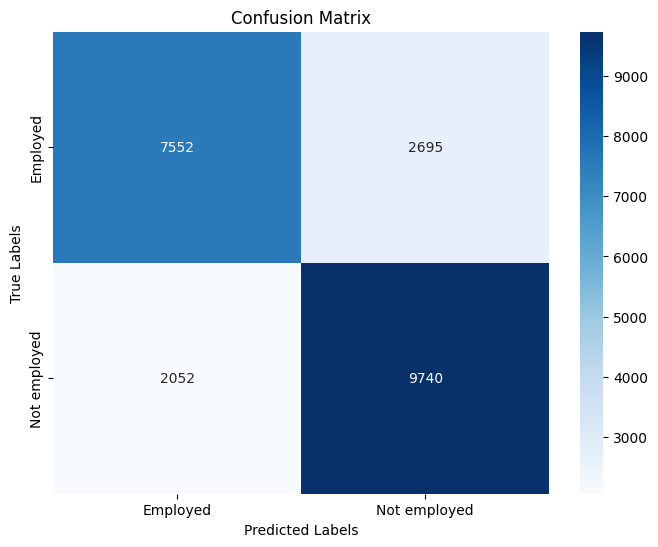

In [159]:

# Generate the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred)  # Assuming y_test are your true labels and y_pred are your predictions

# Create labels for the classes
class_labels = ['Employed', 'Not employed']  # Replace with your actual class names/labels

# Create a heatmap
plt.figure(figsize=(8, 6))  # Can adjust the size as needed
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

# Add labels and a title
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [164]:
# Predict the outcomes using the best RandomForest model
y_pred = pipeline.predict(X_test)

# Generate and display the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.74      0.76     10247
           1       0.78      0.83      0.80     11792

    accuracy                           0.78     22039
   macro avg       0.78      0.78      0.78     22039
weighted avg       0.78      0.78      0.78     22039



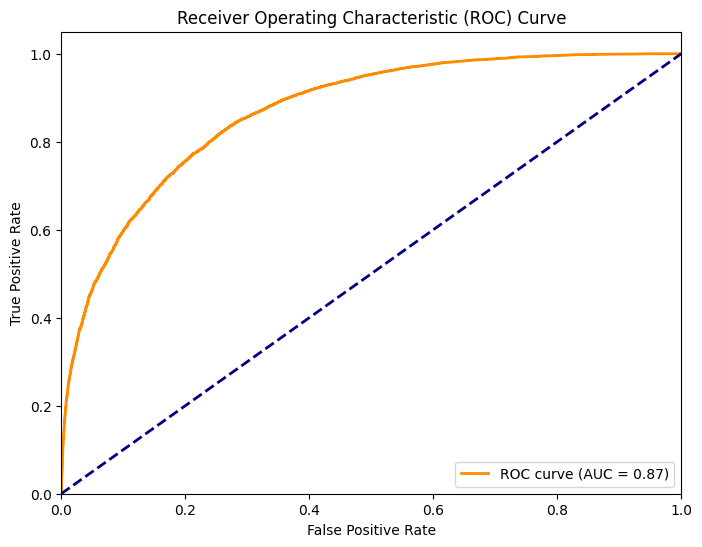

In [166]:

# Step 1: Compute the predicted probabilities for the positive class
y_prob = pipeline.predict_proba(X_test)[:,1]

# Step 2: Compute FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Step 3: Compute the AUC
roc_auc = auc(fpr, tpr)

# Step 4: Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()